<a href="https://colab.research.google.com/github/sigma-asif/data-communication-lab/blob/main/line_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1, 1, 0, 0, 1, 1]


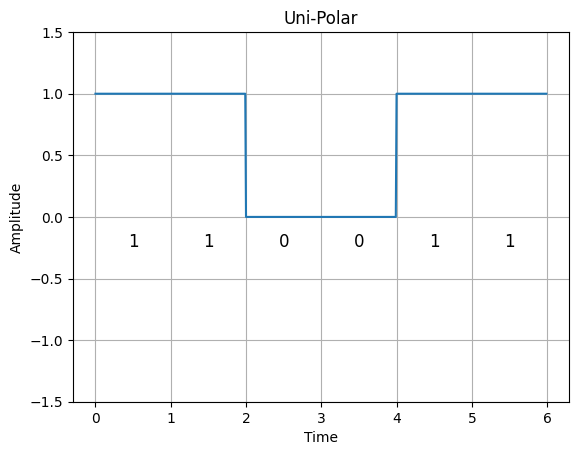

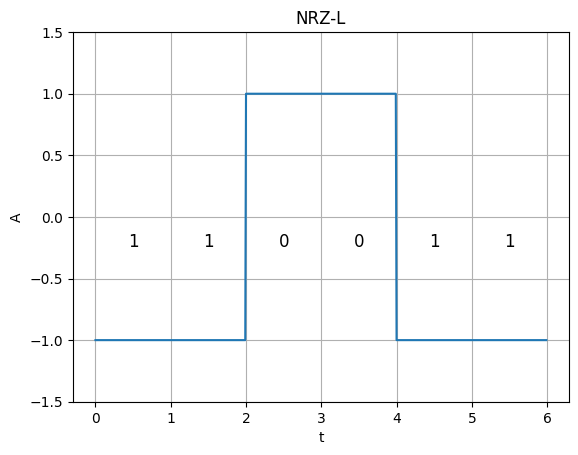

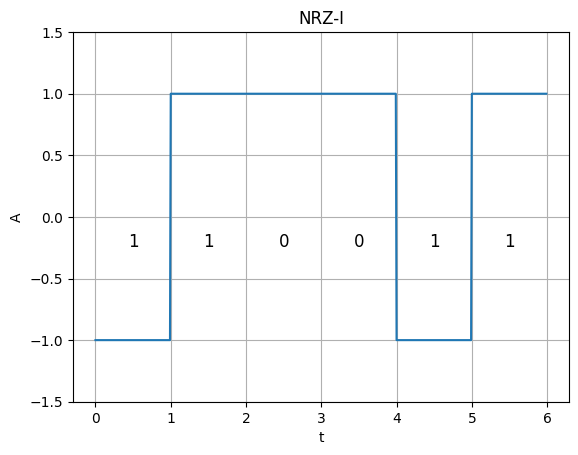

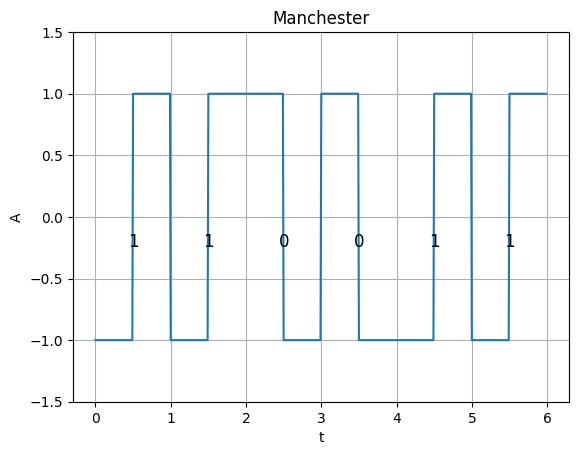

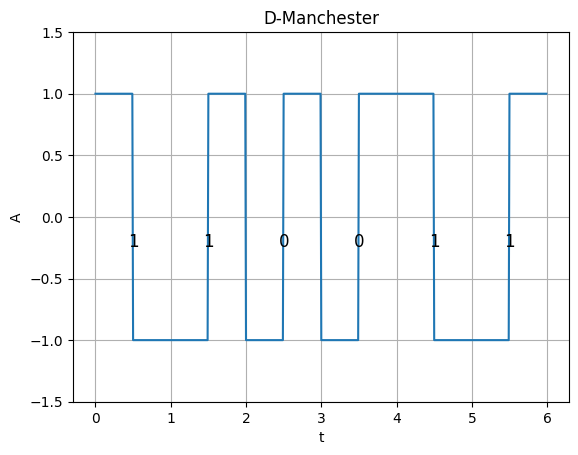

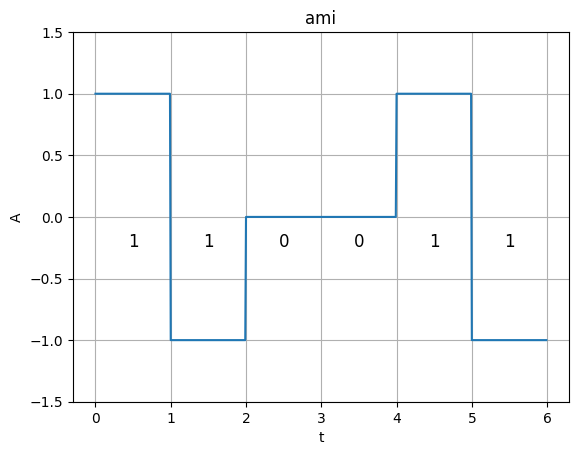

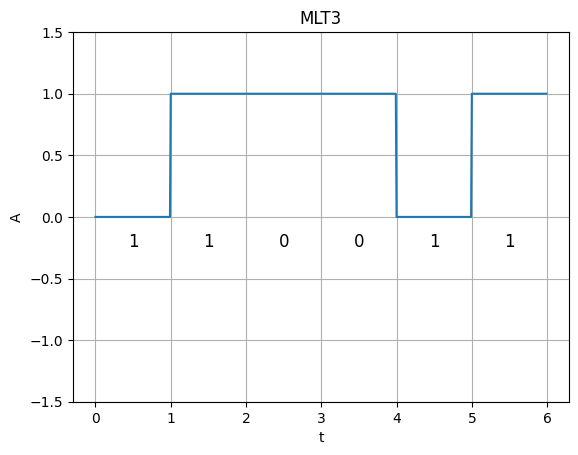

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def unipolar(binary_list,sr):
     h = 1 #int
     l = 0
     signal = []

     for bit in binary_list:
        if bit == 0:
            signal.extend([l]*sr)
        else:
            signal.extend([h]*sr)

     return signal

def nrzl(binary_list, sr):
    h = 1
    l = -1
    signal = []

    for bit in binary_list:
        if bit == 0:
            signal.extend([h]*sr)
        else:
            signal.extend([l]*sr)

    return signal

def nrzi(binary_list,sr):
    signal = []

    present = 1
    for bit in binary_list:
        if bit == 0:
            signal.extend([present]*sr)
        else:
            present = -present
            signal.extend([present]*sr)

    return signal

def man(binary_list,sr):
    signal = []

    h = 1
    l = -1
    for bit in binary_list:
        if bit == 0:
            signal.extend([h]*(sr//2) + [l]*(sr//2))
        else:
            signal.extend([l]*(sr//2) + [h]*(sr//2))

    return signal

def dman(binary_list,sr):
    signal = []


    present = 1
    for bit in binary_list:
        if bit == 0:
            signal.extend([-present]*(sr//2) + [present]*(sr//2))
        else:
            signal.extend([present]*(sr//2) + [-present]*(sr//2))
            present = - present

    return signal

def ami(binary_list,sr):
    signal = []


    present = 1
    for bit in binary_list:
        if bit == 0:
            signal.extend([0]*sr)
        else:
            signal.extend([present]*sr)
            present = - present

    return signal

def mlt3(binary_list,sr):
    signal = []


    present = 1
    prev = 1;
    for bit in binary_list:
        if bit == 0:
            signal.extend([present]*sr)

        else:
            if(present == 0):
                if(prev == 1):
                    present = -1
                    signal.extend([present]*sr)
                    prev = present
                else:
                    present = 1
                    signal.extend([present]*sr)
                    prev = present
            else:
                prev = present //+1,-1
                present = 0
                signal.extend([present]*sr)
    return signal

'''
  """
def mlt_3(binary_data, sampling_rate):
    signal = []
    current_level = 0  # Start at 0 level
    next_level = -1  # The next level in the MLT-3 cycle

    for bit in binary_data:
        if bit == 1:
            if current_level == 0 and next_level == -1:
                current_level = -next_level
            elif current_level == 0 and next_level == 1:
                current_level = -next_level
            elif current_level == 1 or current_level == -1:  # Transition on '1'
                current_level = -current_level  # Toggle the current level
            next_level = -next_level  # Toggle the next level between 1 and -1
        signal.extend([current_level] * sampling_rate)
    return signal
'''

def main():
    #binary_data = input("Enter a binary data: ")
    binary_list = [1,1,0,0,1,1]
    #binary_list = [int(bit) for bit in binary_data]
    print(binary_list)

    sampling_rate = 100
    t = np.linspace(0, len(binary_list), len(binary_list)*sampling_rate, endpoint = False)

    # unipolar
    signal = unipolar(binary_list,sampling_rate)
    plt.plot(t,signal)
    plt.title("Uni-Polar")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.ylim(-1.5, 1.5)
    # Add bit labels on the x-axis
    for i, bit in enumerate(binary_list): # i index and bit = binary_list[i]
        plt.text(i + 0.5, -0.2, str(bit), horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.show()

    #nrz-l
    signal = nrzl(binary_list,sampling_rate)
    plt.plot(t,signal)
    plt.title("NRZ-L")
    plt.xlabel("t")
    plt.ylabel("A")
    plt.ylim(-1.5, 1.5)
    plt.grid(True)

    for i,bit in enumerate(binary_list):
        plt.text(i + 0.5, -0.2, str(bit), horizontalalignment = 'center', verticalalignment = 'center', fontsize = 12)

    plt.show()

     #nrz-i
    signal = nrzi(binary_list,sampling_rate)
    plt.plot(t,signal)
    plt.title("NRZ-I")
    plt.xlabel("t")
    plt.ylabel("A")
    plt.ylim(-1.5, 1.5)
    plt.grid(True)

    for i,bit in enumerate(binary_list):
        plt.text(i + 0.5, -0.2, str(bit), horizontalalignment = 'center', verticalalignment = 'center', fontsize = 12)

    plt.show()

    #manchester
    signal = man(binary_list,sampling_rate)
    plt.plot(t,signal)
    plt.title("Manchester")
    plt.xlabel("t")
    plt.ylabel("A")
    plt.ylim(-1.5, 1.5)
    plt.grid(True)

    for i,bit in enumerate(binary_list):
        plt.text(i + 0.5, -0.2, str(bit), horizontalalignment = 'center', verticalalignment = 'center', fontsize = 12)

    plt.show()

    #d-manchester
    signal = dman(binary_list,sampling_rate)
    plt.plot(t,signal)
    plt.title("D-Manchester")
    plt.xlabel("t")
    plt.ylabel("A")
    plt.ylim(-1.5, 1.5)
    plt.grid(True)

    for i,bit in enumerate(binary_list):
        plt.text(i + 0.5, -0.2, str(bit), horizontalalignment = 'center', verticalalignment = 'center', fontsize = 12)

    plt.show()

    #ami
    signal = ami(binary_list,sampling_rate)
    plt.plot(t,signal)
    plt.title("ami")
    plt.xlabel("t")
    plt.ylabel("A")
    plt.ylim(-1.5, 1.5)
    plt.grid(True)

    for i,bit in enumerate(binary_list):
        plt.text(i + 0.5, -0.2, str(bit), horizontalalignment = 'center', verticalalignment = 'center', fontsize = 12)

    plt.show()

     #mlt3
    signal = mlt3(binary_list,sampling_rate)
    plt.plot(t,signal)
    plt.title("MLT3")
    plt.xlabel("t")
    plt.ylabel("A")
    plt.ylim(-1.5, 1.5)
    plt.grid(True)

    for i,bit in enumerate(binary_list):
        plt.text(i + 0.5, -0.2, str(bit), horizontalalignment = 'center', verticalalignment = 'center', fontsize = 12)

    plt.show()



main()

